# Customer Segmentation using Classification

## Project By : Kevin Marakana

### Project Overview
In this practical, we will predict customer segments (A, B, C, or D) for potential new customers using machine learning classification models. An automobile company plans to expand into new markets with their existing products (P1-P5), and wants to classify 2,627 new potential customers into segments based on demographic and behavioral attributes.

## Dataset Information
The dataset contains various customer attributes:

| Variable | Definition |
|----------|------------|
| ID | Unique ID of the customer |
| Gender | Gender of the customer |
| Ever_Married | Marital status of the customer |
| Age | Age of the customer |
| Graduated | Whether the customer is a graduate |
| Profession | Profession of the customer |
| Work_Experience | Work experience in years |
| Spending_Score | Spending score of the customer |
| Family_Size | Number of family members (including customer) |
| Var_1 | Anonymized category of the customer |
| Segmentation | Target Variable - Customer segment (A, B, C, or D) |

## Project Tasks

| Task | Description |
|------|-------------|
| 1. Data Exploration | • Load the dataset and display basic statistics<br>• Identify the number of records, missing values, and data types<br>• Visualize class distribution of Segmentation |
| 2. Handling Missing Values | • Identify missing values and impute or drop them as required<br>• Use appropriate strategies such as mean/median for numerical data and mode for categorical data |
| 3. Exploratory Data Analysis | Perform at least 5 analyses:<br>• Univariate Analysis (Distribution plots for numerical features)<br>• Bivariate Analysis (Comparison between variables)<br>• Correlation Heatmap<br>• Bar plot for categorical variables<br>• Outlier detection using box plots |
| 4. Model Building | • Convert categorical variables into numerical representations<br>• Perform train-test split (e.g., 80-20 split)<br>• Train at least four classification models:<br>&nbsp;&nbsp;1. Logistic Regression<br>&nbsp;&nbsp;2. Random Forest Classifier<br>&nbsp;&nbsp;3. Support Vector Machine (SVM)<br>&nbsp;&nbsp;4. XGBoost |
| 5. Model Evaluation | Compare models using performance metrics:<br>• Accuracy<br>• Precision, Recall, and F1-Score<br>• Confusion Matrix |
| 6. Model Saving | • Save the best-performing model |
| 7. Prediction | • Load the saved model and make predictions on the new dataset<br>• Display the predicted segments for new customers |

Let's begin our analysis!

..
### 1. Data Exploration 
    • Load the dataset and display basic statistics. 
    • Identify the number of records, missing values, and data types. 
    • Visualize class distribution of Segmentation. 
..

In [1]:
# Import necessary libraries for data exploration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set display options for better visualization
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Load the datasets
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

..
### Training Dataset Information 
..

In [3]:
# Display basic information about the training dataset
print("Training Dataset Information:")
print(" ")
print(f"Shape of training data: {train_df.shape}")
print("\nFirst 5 rows of training data:")
train_df

Training Dataset Information:
 
Shape of training data: (8068, 11)

First 5 rows of training data:


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [4]:
# Display basic statistics of the training dataset
print("\nBasic statistics of training data:")
train_df.describe()


Basic statistics of training data:


,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [5]:
# Check data types and missing values in training data
print("\nData types in training data:")
train_df.info()

print("\nMissing values in training data:")

missing_values_table = pd.DataFrame({
    'Column': train_df.columns,
    'Missing Values': train_df.isnull().sum(),
    'Percentage': (train_df.isnull().sum() / len(train_df)) * 100
})

missing_values_table.style.hide_index()



Data types in training data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB

Missing values in training data:


C:\Users\KEVIN\AppData\Local\Temp\ipykernel_18604\302936981.py:13: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  missing_values_table.style.hide_index()


Column,Missing Values,Percentage
ID,0,0.000000
Gender,0,0.000000
Ever_Married,140,1.735250
Age,0,0.000000
Graduated,78,0.966782
Profession,124,1.536936
Work_Experience,829,10.275161
Spending_Score,0,0.000000
Family_Size,335,4.152206
Var_1,76,0.941993


In [6]:
# Display class distribution of the target variable
print("\nClass distribution of Segmentation (Target Variable):")
segmentation_counts = train_df['Segmentation'].value_counts()
segmentation_df = pd.DataFrame({
    'Count': segmentation_counts,
    'Percentage': (segmentation_counts / len(train_df) * 100)
})
segmentation_df.style.hide_index()


Class distribution of Segmentation (Target Variable):


C:\Users\KEVIN\AppData\Local\Temp\ipykernel_18604\686013384.py:8: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  segmentation_df.style.hide_index()


Count,Percentage
2268,28.111056
1972,24.442241
1970,24.417452
1858,23.029251


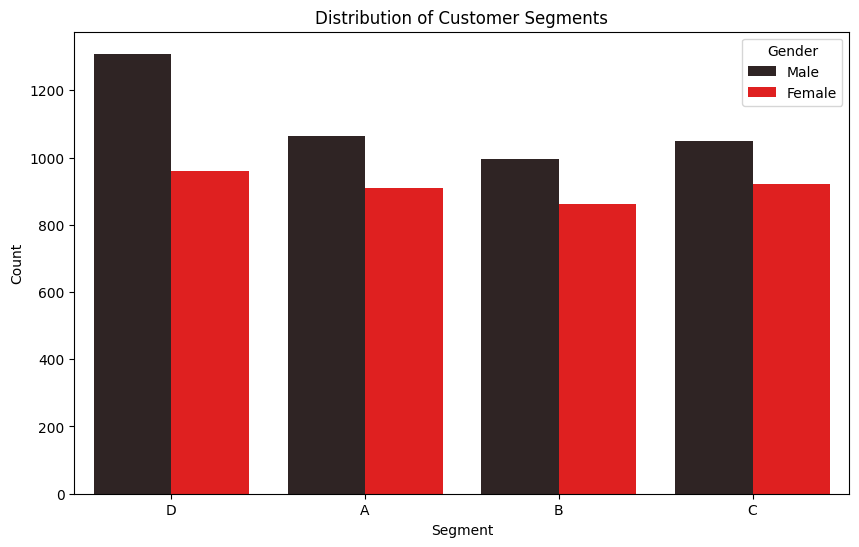

In [7]:
# Visualize the class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Segmentation', data=train_df , palette='dark:red' , hue= train_df['Gender'])
plt.title('Distribution of Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

..
### Testing Dataset Information
..


In [8]:
# Display basic information about the testing dataset
print("\nTesting Dataset Information:")
print(f"Shape of testing data: {test_df.shape}")
print("\nFirst 5 rows of testing data:")
test_df.head()


Testing Dataset Information:
Shape of testing data: (2627, 11)

First 5 rows of testing data:


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [9]:
# Check data types and missing values in Testinging data
print("\nData types in testing data:")


test_df.info()

print("\nMissing values in testing data:")

missing_values_table = pd.DataFrame({
    'Column': test_df.columns,
    'Missing Values': test_df.isnull().sum(),
    'Percentage': (test_df.isnull().sum() / len(test_df)) * 100
})

missing_values_table.style.hide_index()


Data types in testing data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
 10  Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 225.9+ KB

Missing values in testing data:


C:\Users\KEVIN\AppData\Local\Temp\ipykernel_18604\1876749517.py:15: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  missing_values_table.style.hide_index()


Column,Missing Values,Percentage
ID,0,0.000000
Gender,0,0.000000
Ever_Married,50,1.903312
Age,0,0.000000
Graduated,24,0.913590
Profession,38,1.446517
Work_Experience,269,10.239817
Spending_Score,0,0.000000
Family_Size,113,4.301485
Var_1,32,1.218120


..
### 2. Handling Missing Values: 
    • Identify missing values and impute or drop them as required. 
    • Use appropriate strategies such as mean/median for numerical data and mode for categorical data.
..

In [10]:
# Function to handle missing values
def handle_missing_values(df):
    df_copy = df.copy()
    
    # For numerical columns, fill missing values with median
    numerical_cols = df_copy.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_cols:
        if df_copy[col].isnull().sum() > 0:
            median_value = df_copy[col].median()
            df_copy[col].fillna(median_value, inplace=True)
            print(f"Filled missing values in {col} with median: {median_value}")
    
    # For categorical columns, fill missing values with mode
    categorical_cols = df_copy.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df_copy[col].isnull().sum() > 0:
            mode_value = df_copy[col].mode()[0]
            df_copy[col].fillna(mode_value, inplace=True)
            print(f"Filled missing values in {col} with mode: {mode_value}")
    
    return df_copy

In [11]:
# Apply the function to handle missing values in both datasets
train_df_clean = handle_missing_values(train_df)
test_df_clean = handle_missing_values(test_df)

Filled missing values in Work_Experience with median: 1.0
Filled missing values in Family_Size with median: 3.0
Filled missing values in Ever_Married with mode: Yes
Filled missing values in Graduated with mode: Yes
Filled missing values in Profession with mode: Artist
Filled missing values in Var_1 with mode: Cat_6
Filled missing values in Work_Experience with median: 1.0
Filled missing values in Family_Size with median: 2.0
Filled missing values in Ever_Married with mode: Yes
Filled missing values in Graduated with mode: Yes
Filled missing values in Profession with mode: Artist
Filled missing values in Var_1 with mode: Cat_6


In [12]:
# Verify that there are no missing values left
print("\nMissing values in training data after imputation:")

train_clean = pd.DataFrame({
    'Column': train_df_clean.columns,
    'Missing Values': train_df_clean.isnull().sum(),
    'Percentage': (train_df_clean.isnull().sum() / len(train_df_clean)) * 100
})

train_clean.style.hide_index()


Missing values in training data after imputation:


C:\Users\KEVIN\AppData\Local\Temp\ipykernel_18604\1011372368.py:10: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  train_clean.style.hide_index()


Column,Missing Values,Percentage
ID,0,0.000000
Gender,0,0.000000
Ever_Married,0,0.000000
Age,0,0.000000
Graduated,0,0.000000
Profession,0,0.000000
Work_Experience,0,0.000000
Spending_Score,0,0.000000
Family_Size,0,0.000000
Var_1,0,0.000000


In [73]:
print("\nMissing values in testing data after imputation:")


test_clean = pd.DataFrame({
    'Column': test_df_clean.columns,
    'Missing Values': test_df_clean.isnull().sum(),
    'Percentage': (test_df_clean.isnull().sum() / len(test_df_clean)) * 100
})

test_clean.style.hide_index()




Missing values in testing data after imputation:


C:\Users\KEVIN\AppData\Local\Temp\ipykernel_18604\1547337592.py:10: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  test_clean.style.hide_index()


Column,Missing Values,Percentage
ID,0,0.000000
Gender,0,0.000000
Ever_Married,0,0.000000
Age,0,0.000000
Graduated,0,0.000000
Profession,0,0.000000
Work_Experience,0,0.000000
Spending_Score,0,0.000000
Family_Size,0,0.000000
Var_1,0,0.000000


In [71]:
train_df_clean.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,8068.000000,8068.000000
mean,463479.214551,43.466906,2.472980,2.856346
std,2595.381232,16.711696,3.265248,1.499577
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


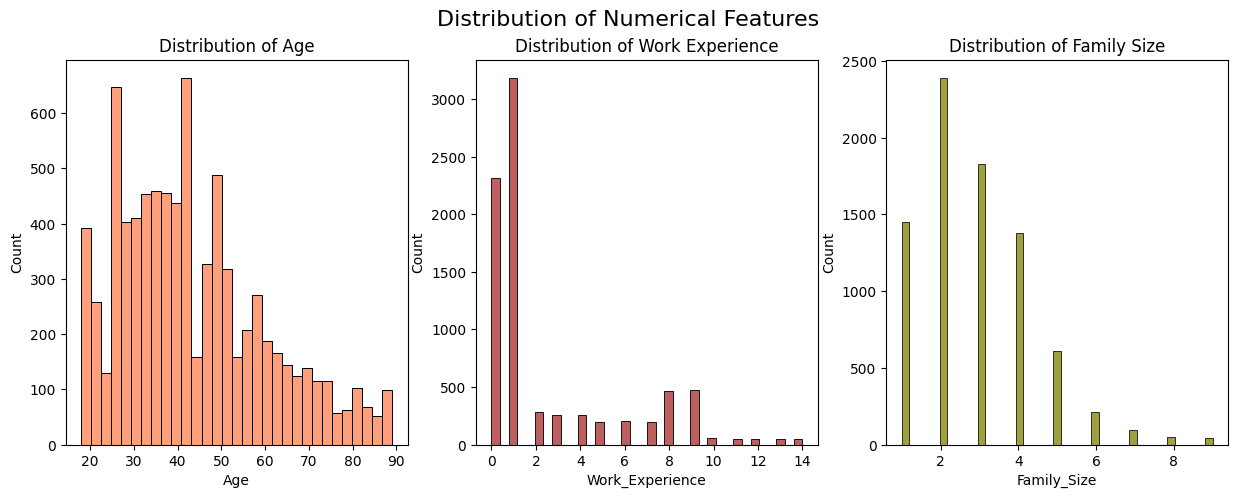

In [15]:
# Exploratory Data Analysis (EDA)

# Univariate Analysis for numerical features
plt.figure(figsize=(15, 5))

# Age distribution
plt.subplot(1, 3, 1)
sns.histplot(train_df_clean['Age'], color='coral')
plt.title('Distribution of Age')

# Work Experience distribution
plt.subplot(1, 3, 2)
sns.histplot(train_df_clean['Work_Experience'], color='brown')
plt.title('Distribution of Work Experience')

# Family Size distribution
plt.subplot(1, 3, 3)
sns.histplot(train_df_clean['Family_Size'],color='olive')
plt.title('Distribution of Family Size')


plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

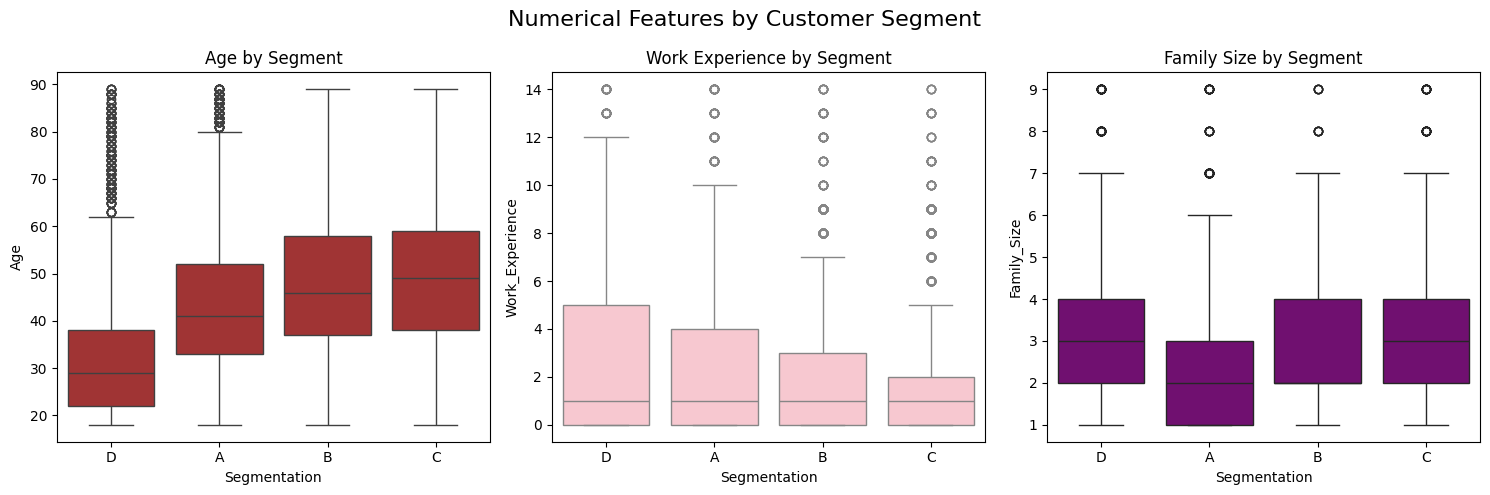

In [16]:
# Bivariate Analysis: Box plots for numerical features by segment
plt.figure(figsize=(15, 5))

# Age by Segment
plt.subplot(1, 3, 1)
sns.boxplot(x='Segmentation', y='Age', data=train_df_clean , color='firebrick')
plt.title('Age by Segment')


# Work Experience by Segment
plt.subplot(1, 3, 2)
sns.boxplot(x='Segmentation', y='Work_Experience', data=train_df_clean , color='pink')
plt.title('Work Experience by Segment')


# Family Size by Segment
plt.subplot(1, 3, 3)
sns.boxplot(x='Segmentation', y='Family_Size', data=train_df_clean , color='purple')
plt.title('Family Size by Segment')


plt.suptitle('Numerical Features by Customer Segment', fontsize=16)
plt.tight_layout()
plt.show()

In [17]:
numerical_features = train_df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = [f for f in numerical_features if f != 'ID'] 

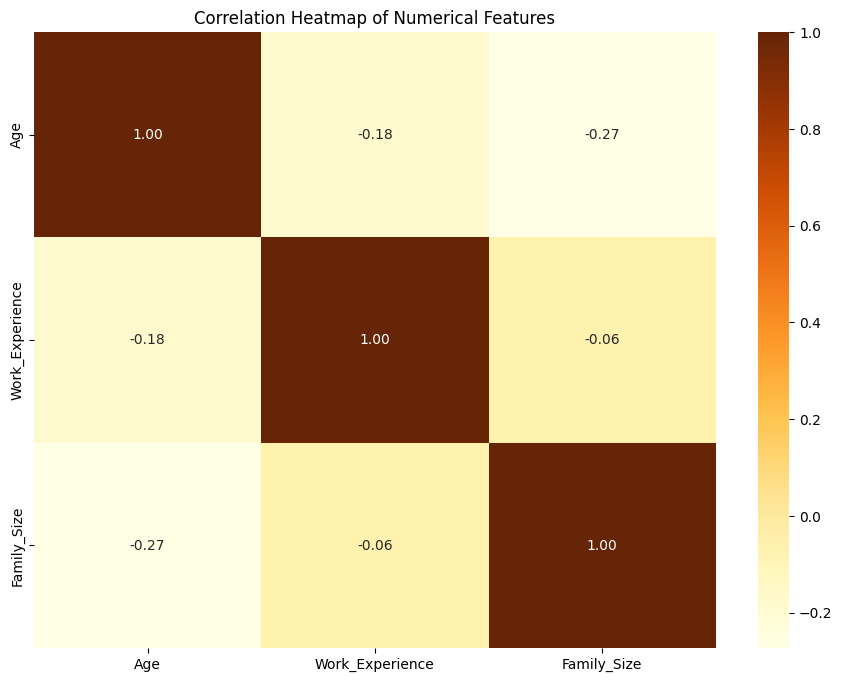

In [18]:
# 3. Correlation Heatmap
plt.figure(figsize=(11, 8))
correlation_matrix = train_df_clean[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

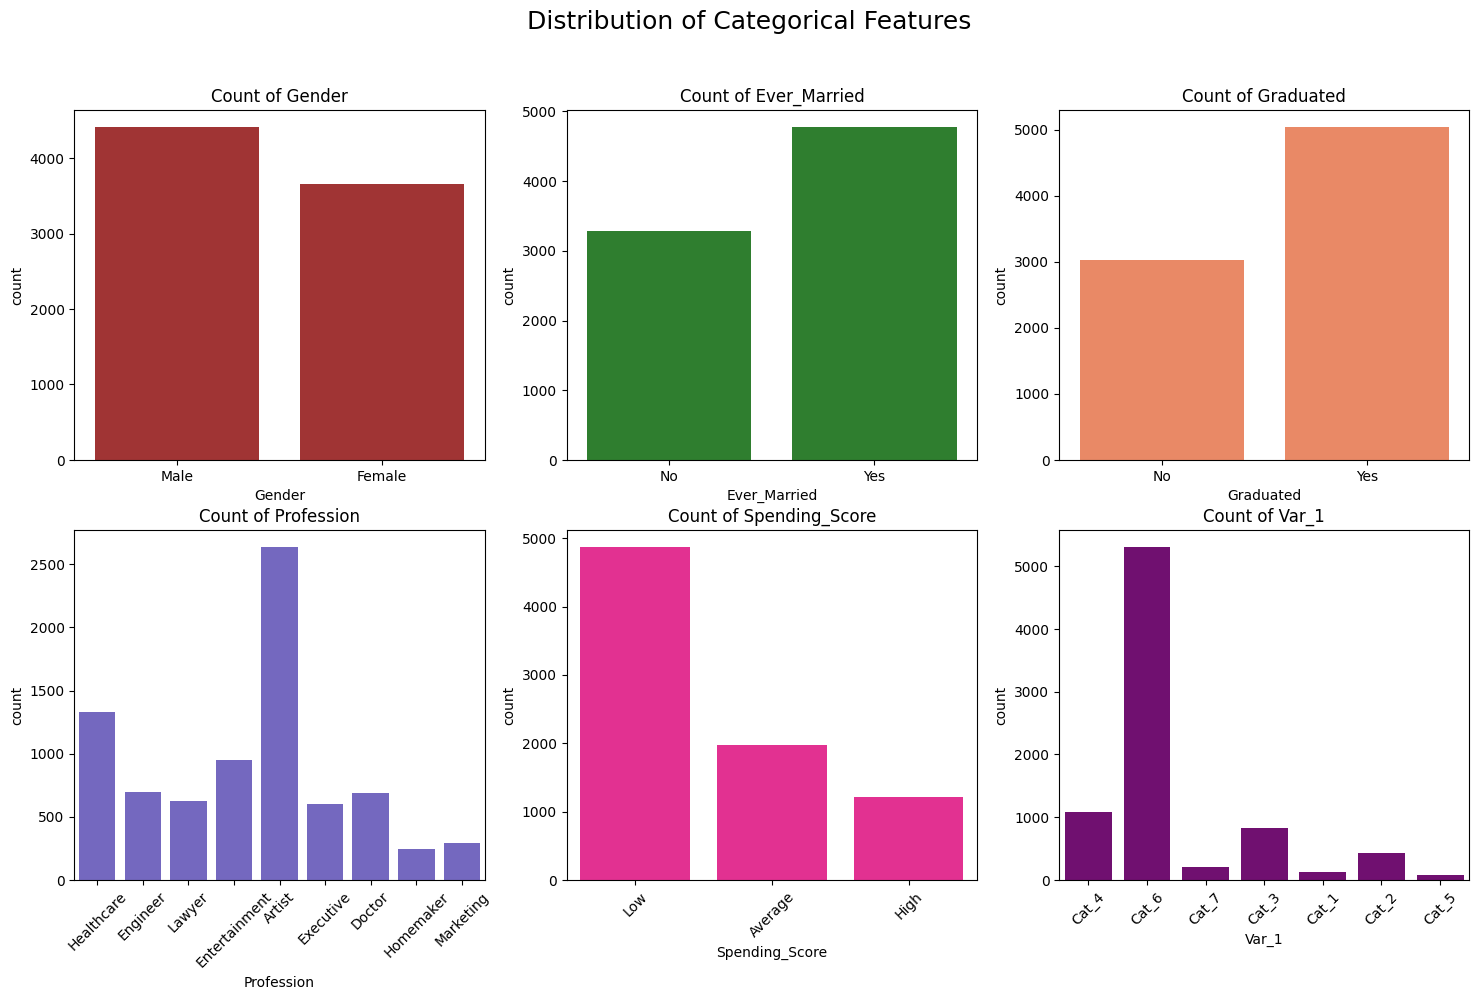

In [19]:
# Bar plots for categorical variables
plt.figure(figsize=(18 , 10))

# Gender
plt.subplot(2, 3, 1)
sns.countplot(x='Gender', data=train_df_clean, color='firebrick')
plt.title('Count of Gender')


# Ever_Married
plt.subplot(2, 3, 2)
sns.countplot(x='Ever_Married', data=train_df_clean, color='forestgreen')
plt.title('Count of Ever_Married')


# Graduated
plt.subplot(2, 3, 3)
sns.countplot(x='Graduated', data=train_df_clean, color='coral')
plt.title('Count of Graduated')


# Profession
plt.subplot(2, 3, 4)
sns.countplot(x='Profession', data=train_df_clean, color='slateblue')
plt.title('Count of Profession')
plt.xticks(rotation=45)

# Spending_Score
plt.subplot(2, 3, 5)
sns.countplot(x='Spending_Score', data=train_df_clean, color='deeppink')
plt.title('Count of Spending_Score')
plt.xticks(rotation=45)

# Var_1
plt.subplot(2, 3, 6)
sns.countplot(x='Var_1', data=train_df_clean, color='purple')
plt.title('Count of Var_1')
plt.xticks(rotation=45)


plt.suptitle('Distribution of Categorical Features',  fontsize=18)
plt.show()

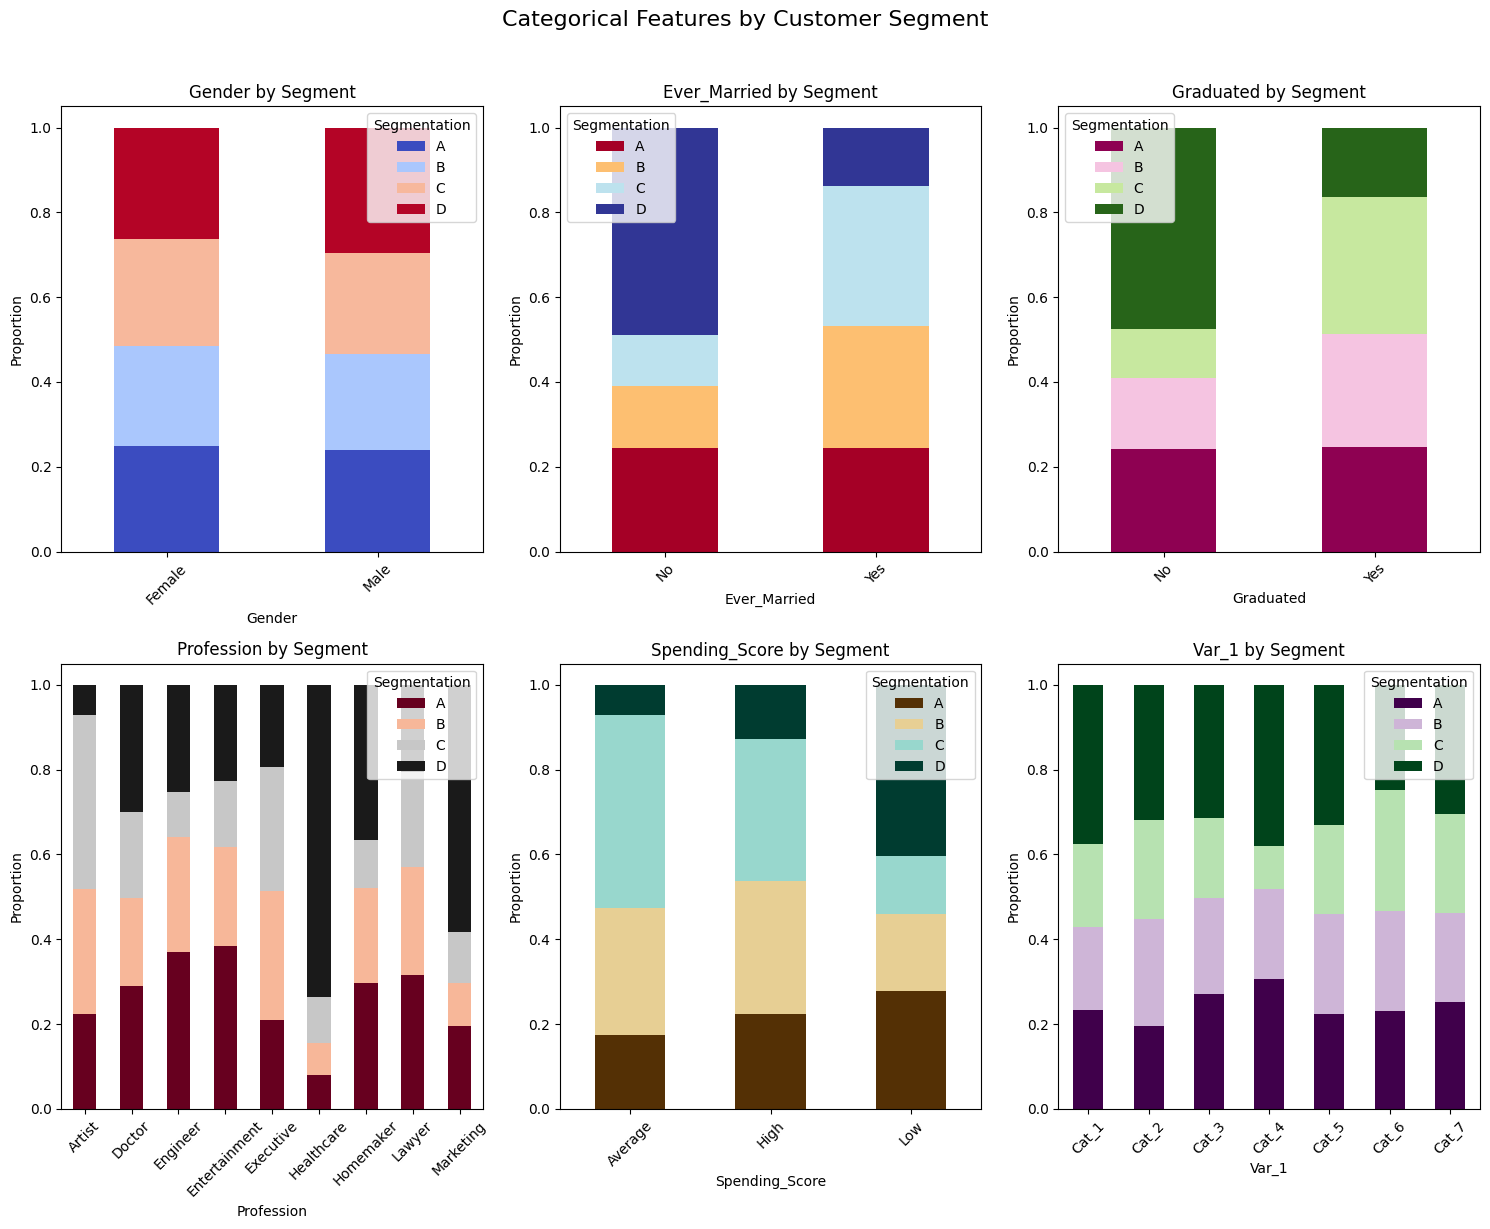

In [20]:
# 5. Stacked bar plots for categorical variables by segment
fig = plt.figure(figsize=(15, 12))
plt.clf()  # Clear the current figure

# Gender
ax1 = plt.subplot(2, 3, 1)
pd.crosstab(train_df_clean['Gender'], train_df_clean['Segmentation'], normalize='index').plot(
    kind='bar', stacked=True, colormap='coolwarm', ax=ax1)
plt.title('Gender by Segment')
plt.xticks(rotation=45)
plt.ylabel('Proportion')

# Ever_Married 
ax2 = plt.subplot(2, 3, 2)
pd.crosstab(train_df_clean['Ever_Married'], train_df_clean['Segmentation'], normalize='index').plot(
    kind='bar', stacked=True, colormap='RdYlBu', ax=ax2)
plt.title('Ever_Married by Segment')
plt.xticks(rotation=45)
plt.ylabel('Proportion')

# Graduated
ax3 = plt.subplot(2, 3, 3)
pd.crosstab(train_df_clean['Graduated'], train_df_clean['Segmentation'], normalize='index').plot(
    kind='bar', stacked=True, colormap='PiYG', ax=ax3)
plt.title('Graduated by Segment') 
plt.xticks(rotation=45)
plt.ylabel('Proportion')

# Profession
ax4 = plt.subplot(2, 3, 4)
pd.crosstab(train_df_clean['Profession'], train_df_clean['Segmentation'], normalize='index').plot(
    kind='bar', stacked=True, colormap='RdGy', ax=ax4)
plt.title('Profession by Segment')
plt.xticks(rotation=45)
plt.ylabel('Proportion')

# Spending_Score
ax5 = plt.subplot(2, 3, 5)
pd.crosstab(train_df_clean['Spending_Score'], train_df_clean['Segmentation'], normalize='index').plot(
    kind='bar', stacked=True, colormap='BrBG', ax=ax5)
plt.title('Spending_Score by Segment')
plt.xticks(rotation=45)
plt.ylabel('Proportion')

# Var_1
ax6 = plt.subplot(2, 3, 6)
pd.crosstab(train_df_clean['Var_1'], train_df_clean['Segmentation'], normalize='index').plot(
    kind='bar', stacked=True, colormap='PRGn', ax=ax6)
plt.title('Var_1 by Segment')
plt.xticks(rotation=45)
plt.ylabel('Proportion')

plt.suptitle('Categorical Features by Customer Segment', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

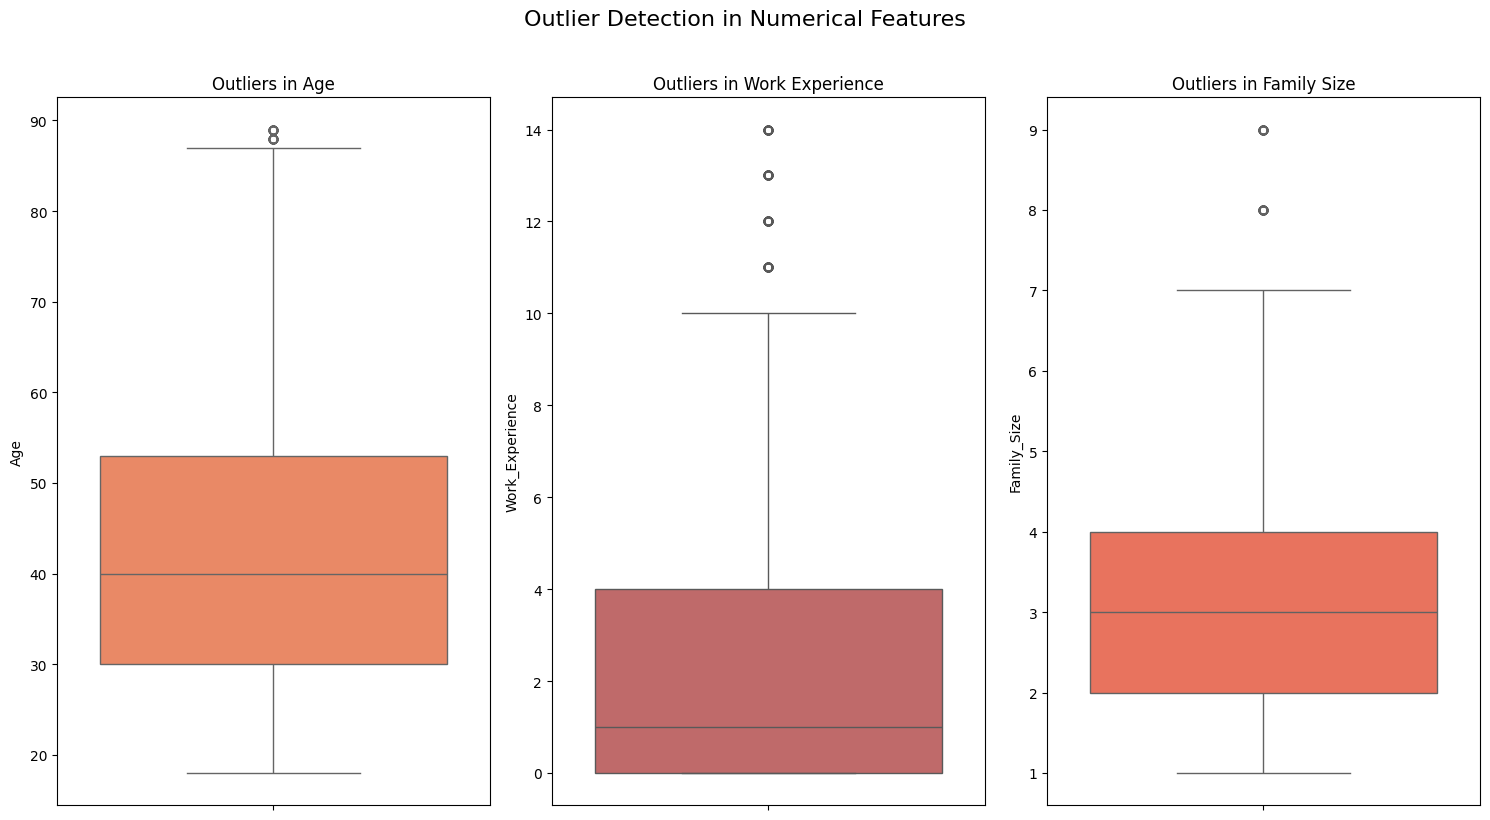

In [21]:
# 6. Outlier detection using box plots
plt.figure(figsize=(15, 8))

# Age boxplot
plt.subplot(1, 3, 1)
sns.boxplot(y='Age', data=train_df_clean, color='coral')
plt.title('Outliers in Age')

# Work Experience boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y='Work_Experience', data=train_df_clean, color='indianred')
plt.title('Outliers in Work Experience')

# Family Size boxplot
plt.subplot(1, 3, 3)
sns.boxplot(y='Family_Size', data=train_df_clean, color='tomato')
plt.title('Outliers in Family Size')

plt.suptitle('Outlier Detection in Numerical Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

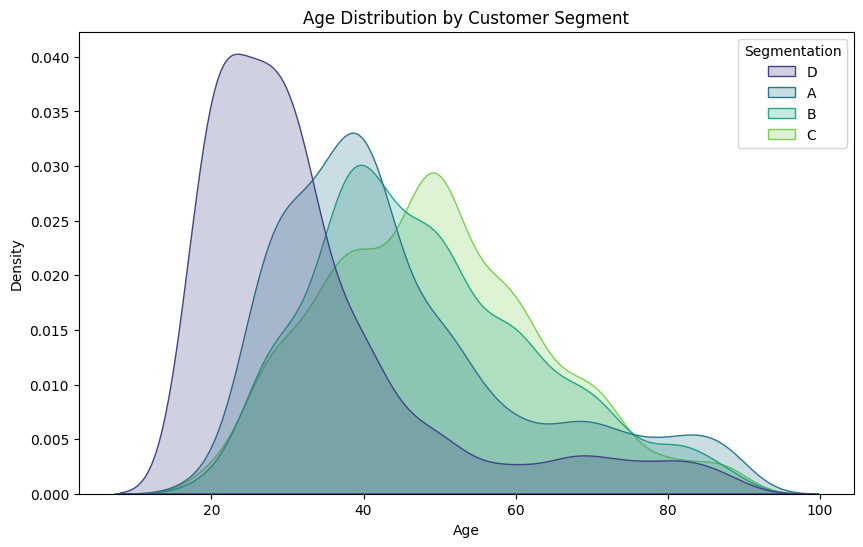

In [22]:
# 7. Additional analysis: Age distribution by segment
plt.figure(figsize=(10, 6))
sns.kdeplot(data=train_df_clean, x='Age', hue='Segmentation', fill=True, common_norm=False, palette='viridis')
plt.title('Age Distribution by Customer Segment')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

<Figure size 1000x600 with 0 Axes>

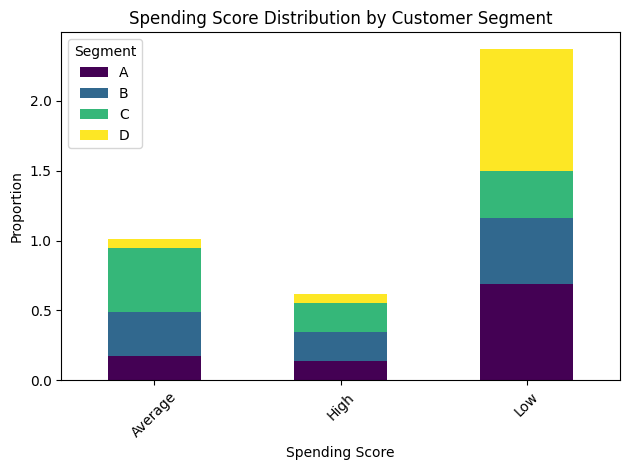

In [23]:
# 8. Additional analysis: Spending score distribution by segment
plt.figure(figsize=(10, 6))
spending_seg = pd.crosstab(train_df_clean['Spending_Score'], train_df_clean['Segmentation'], normalize='columns')
spending_seg.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Spending Score Distribution by Customer Segment')
plt.xlabel('Spending Score')
plt.ylabel('Proportion')
plt.legend(title='Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

..
### 4. Model Building: 
    • Convert categorical variables into numerical representations. 
    • Perform train-test split (e.g., 80-20 split). 
    • Train at least four classification models:  
        1. Logistic Regression 
        2. Random Forest Classifier 
        3. Support Vector Machine (SVM) 
        4. Xgboost 
..

In [145]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy

classifier = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier()
}

In [133]:
A = train_df_clean.drop(['ID', 'Segmentation'], axis=1)
B = train_df_clean['Segmentation']


C = test_df_clean.drop(['ID', 'Segmentation'], axis=1)
D = test_df_clean['Segmentation']

In [ ]:

numerical_features = ['Age', 'Work_Experience', 'Family_Size']
categorical_features = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']


numeric_transformer = StandardScaler()
categorical_transformer = LabelEncoder()


def transform_data(df):
    df_transformed = df.copy()
    
    df_transformed[numerical_features] = numeric_transformer.fit_transform(df_transformed[numerical_features])
    
    for feature in categorical_features:
        df_transformed[feature] = categorical_transformer.fit_transform(df_transformed[feature])
    
    return df_transformed


A_train_processed = transform_data(A)
#B_train_processed = LabelEncoder().fit_transform(B)

C_test_processed = transform_data(C)
#D_test_processed = LabelEncoder().fit_transform(D)

In [122]:

X = pd.concat([A_train_processed, C_test_processed], ignore_index=True)


In [135]:
Y = pd.concat([B,D], ignore_index=True)
Y = LabelEncoder().fit_transform(Y)

..
## 5. Model Evaluation: 
    • Compare models using performance metrics such as:  
        o Accuracy 
        o Precision, Recall, and F1-Score 
        o Confusion Matrix
..

In [153]:
model_scores = {}
for name, clf in classifier.items():
    print("\n" + "="*30)
    print(f"Classifier: {name}")
    print("="*30)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    model_scores[name] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }

    print(f"\n🔹 Accuracy: {accuracy:.4f}")
    print("\n📊 Performance Metrics:")
    print("-" * 60)
    print(f"{'Average Type':<15} {'Precision':<20} {'Recall':<20} {'F1 Score':<20}")
    print("-" * 60)

    for avg in ['macro', 'micro', 'weighted']:
        p = precision_score(y_test, y_pred, average=avg)
        r = recall_score(y_test, y_pred, average=avg)
        f = f1_score(y_test, y_pred, average=avg)
        print(f"{str(avg):<15} {p:.4f}            {r:.4f}            {f:.4f}")

    print("-" * 60)
    print("\n📌 Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "="*30 + "\n")




Classifier: Logistic Regression

🔹 Accuracy: 0.4549

📊 Performance Metrics:
------------------------------------------------------------
Average Type    Precision            Recall               F1 Score            
------------------------------------------------------------
macro           0.4246            0.4450            0.4066
micro           0.4549            0.4549            0.4549
weighted        0.4293            0.4549            0.4160
------------------------------------------------------------

📌 Confusion Matrix:
[[256  24 136 168]
 [185  30 189  86]
 [ 96  25 282  69]
 [123  13  52 405]]



Classifier: Random Forest

🔹 Accuracy: 0.4474

📊 Performance Metrics:
------------------------------------------------------------
Average Type    Precision            Recall               F1 Score            
------------------------------------------------------------
macro           0.4373            0.4409            0.4382
micro           0.4474            0.4474            0

In [156]:
best_model = max(model_scores, key=lambda x: model_scores[x]["precision"])

print("\n" + "="*40)
print(f"🏆 Best Model: {best_model}")
print(f"🔹 Accuracy: {model_scores[best_model]['accuracy']:.4f}")
print(f"🔹 Precision: {model_scores[best_model]['precision']:.4f}")
print(f"🔹 Recall: {model_scores[best_model]['recall']:.4f}")
print(f"🔹 F1 Score: {model_scores[best_model]['f1_score']:.4f}")
print("="*40)


🏆 Best Model: SVM
🔹 Accuracy: 0.4815
🔹 Precision: 0.4847
🔹 Recall: 0.4815
🔹 F1 Score: 0.4761


..
## 6. Model Saving: 
    • Save the best-performing model. 
..

In [171]:
import joblib

joblib.dump(classifier[best_model], 'best_model.pkl')

['best_model.pkl']

..
## 7. Prediction: 
    • Load the saved model and make predictions on the new dataset. 
    • Display the predicted segments for new customers.
..

In [179]:
import joblib
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

model = joblib.load('best_model.pkl')

new_data_path = 'Test.csv'
df_new = pd.read_csv(new_data_path)

In [180]:
if 'ID' in df_new.columns:
    df_ids = df_new[['ID']]
    df_new = df_new.drop(columns=['ID'])
else:
    df_ids = None

unused_columns = ['Segmentation']
df_new = df_new.drop(columns=[col for col in unused_columns if col in df_new.columns])

In [181]:
numerical_features = ['Age', 'Work_Experience', 'Family_Size']
categorical_features = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

imputer_num = SimpleImputer(strategy='mean')  
imputer_cat = SimpleImputer(strategy='most_frequent') 
scaler = StandardScaler()
label_encoders = {feature: LabelEncoder() for feature in categorical_features}

def transform_data(df):
    df_transformed = df.copy()
    
    df_transformed[numerical_features] = imputer_num.fit_transform(df_transformed[numerical_features])
    df_transformed[categorical_features] = imputer_cat.fit_transform(df_transformed[categorical_features])
    
    df_transformed[numerical_features] = scaler.fit_transform(df_transformed[numerical_features])
    for feature in categorical_features:
        df_transformed[feature] = label_encoders[feature].fit_transform(df_transformed[feature])
    
    return df_transformed

df_processed = transform_data(df_new)

if df_processed.isnull().values.any():
    print("Warning: NaN values still present after transformation!")

In [183]:

predictions = model.predict(df_processed)

prediction_mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}
predictions_mapped = [prediction_mapping[pred] for pred in predictions]

output_df = pd.DataFrame({'Prediction': predictions_mapped})
if df_ids is not None:
    output_df = pd.concat([df_ids, output_df], axis=1)
output_df.to_csv('Predictions.csv', index=False)

print("Predictions:")
print(output_df)
print("Predictions saved to Predictions.csv")

Predictions:
          ID Prediction
0     458989          A
1     458994          C
2     458996          B
3     459000          C
4     459001          D
...      ...        ...
2622  467954          D
2623  467958          A
2624  467960          A
2625  467961          B
2626  467968          D

[2627 rows x 2 columns]
Predictions saved to Predictions.csv
